# Statement

Дан массив вещественных чисел A[1:n]. Предложите алгоритм, находящий для каждого элемента A индекс ближайшего справа элемента, большего его хотя бы в два раза. Если такого элемента нет, то должно возвращаться значение None. Ограничение по времени $O(n \log n)$, по дополнительной памяти — $O(n)$.

# Solution

In [1]:
def index_larger_elements(A, k=2):
    # list of ratios between the current element and all subsequent ones
    I = [None] * len(A)   # indexes
    R = [None] * len(A)   # ratios
    for i in range(len(A)):
        for j in range(i, len(A)):
            R[j] = A[j]/A[i]
            if R[j] >= k:
                I[i] = j
                break
    return(I)

In [2]:
def index_larger_elements_2(A, k=2):
    # list of ratios between the first element and all the others
    R = [None] * len(A)   # ratios
    I = [None] * len(A)   # indexes
    max_a = max(A)
    for i in range(0, len(A)):
        if i > 0:
            # if there is no solution for the previous element which is smaller,
            # there is no solution for the current one
            if A[i] >= A[i-1] and I[i-1] is None:
                I[i] = None
                continue
        if max_a/A[i] < k:
            continue
        for j in range(i, len(A)):
            R[j] = A[j]/A[i]
            if R[j] >= k:
                I[i] = j
                break
    return(I)

In [3]:
def index_larger_elements_3(A, k=2):
    I = [None] * len(A)   # indexes
    max_a = max(A)
    for i in range(0, len(A)):
        if i > 0:
            # if there is no solution for the previous element which is smaller,
            # there is no solution for the current one
            if A[i] >= A[i-1] and I[i-1] is None:
                I[i] = None
                continue
        if max_a/A[i] < k:
            continue
        for j in range(i, len(A)):
            if A[j]/A[i] >= k:
                I[i] = j
                break
    return(I)

# Evaluation

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [5]:
A = np.random.randint(1, 1000, 10)
print(A)
print(index_larger_elements_2(A))

[220 275 435 770 601 530 832 540 493  56]
[3, 3, None, None, None, None, None, None, None, None]


In [8]:
n_max = 15000
n_list = np.arange(1, n_max, 500)
t = {}

for n in n_list:
    t[n] = []
    for i in range(10):
        A = np.random.randint(1, 1000, n)
        start_time = time.time()
        I = index_larger_elements_3(A)
        end_time = time.time()
        t[n].append(end_time-start_time)
        
mean_times = [np.mean(times) for times in t.values()]

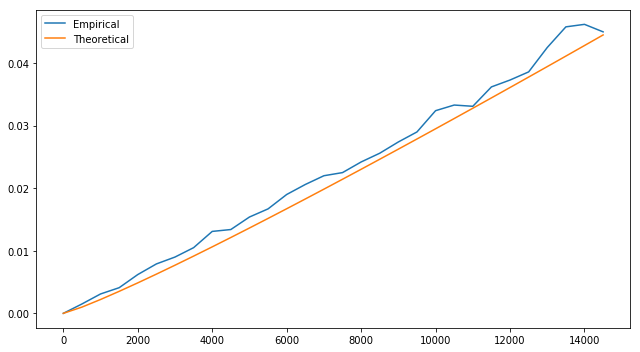

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))

ax.plot(t.keys(), mean_times)
ax.plot(n_list, (n_list*np.log(n_list))*(max(mean_times)/(n_max*np.log(n_max))))

ax.legend(['Empirical', 'Theoretical'])

fig.tight_layout()

# $n \log n$

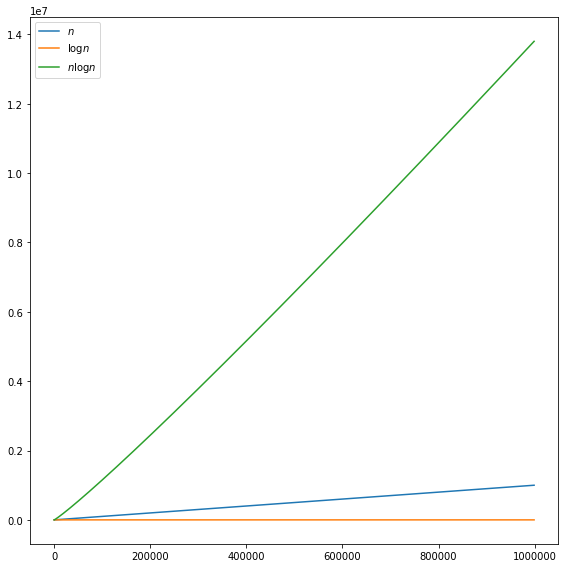

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

n_list = np.arange(1, 1000000, 1000)
ax.plot(n_list, n_list)
ax.plot(n_list, np.log(n_list))
ax.plot(n_list, n_list*np.log(n_list))

ax.legend(['$n$', '$\log n$', '$n\log n$'])

fig.tight_layout()